<a href="https://colab.research.google.com/github/yudhiesh1997/Approaching-Almost-Any-Machine-Learning-Problem/blob/master/CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Cross validation 

*Cross validation is a step in the process of building machine learning models which helps ensure that our models fit the data accurately and also ensures that we do not overfit.*

In [35]:
wine = pd.read_csv("/content/winequality-red.csv")

In [36]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [37]:
# Map all the values of the quality from 0 to 5

quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [38]:
wine.loc[:, "quality"] = wine.quality.map(quality_mapping)

In [39]:
wine.quality

0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64

In [40]:
# Split the data into 1000 - train and 599 - test

wine = wine.sample(frac=1).reset_index(drop=True)

# first 1000 for train 
wine_train = wine.head(1000)

# last 599 for test 
wine_test = wine.tail(599)

In [41]:
# Try and train a Decision Tree Classifier on this 

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_clf = DecisionTreeClassifier(max_depth=3)

# choose the columns to train on 

cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

tree_clf.fit(wine_train[cols], wine_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
# Test the accuracy of the model 

train_predictions = tree_clf.predict(wine_train[cols])
test_predictions = tree_clf.predict(wine_test[cols])

training_accuracy = metrics.accuracy_score(wine_train.quality, train_predictions)
testing_accuracy = metrics.accuracy_score(wine_test.quality, test_predictions)
print("Training accuracy :", training_accuracy)
print("Test accuracy     :", testing_accuracy)

Training accuracy : 0.591
Test accuracy     : 0.5459098497495827


In [43]:
# Plot the curve of the max depth vs the accuracy 
import seaborn as sns 
import matplotlib


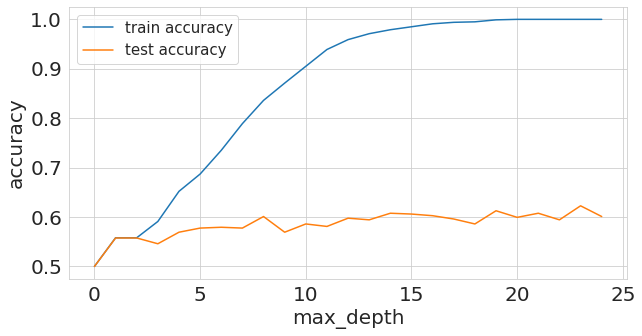

In [46]:
matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)

%matplotlib inline 
train_accuracies = [0.5]
test_accuracies = [0.5]
cols = [  'fixed acidity',  'volatile acidity',  'citric acid',  'residual sugar',  'chlorides',  'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates', 'alcohol']

for depth in range(1,25):
  clf = DecisionTreeClassifier(max_depth=depth)
  #fit the model on given features  
  clf.fit(wine_train[cols], wine_train.quality)  
  #create training & test predictions  
  train_predictions = clf.predict(wine_train[cols])  
  test_predictions = clf.predict(wine_test[cols])  
  #calculate training & test accuracies  
  train_accuracy = metrics.accuracy_score(wine_train.quality, train_predictions)
  test_accuracy = metrics.accuracy_score(wine_test.quality, test_predictions)  
  #append accuracies  
  train_accuracies.append(train_accuracy)  
  test_accuracies.append(test_accuracy)  
  #create two plots using matplotlib  and seaborn  
plt.figure(figsize=(10, 5))  
sns.set_style("whitegrid")  
plt.plot(train_accuracies, label="train accuracy")  
plt.plot(test_accuracies, label="test accuracy")  
plt.legend(loc="upper left", prop={'size': 15})  
plt.xticks(range(0, 26, 5))  
plt.xlabel("max_depth", size=20)  
plt.ylabel("accuracy", size=20)  
plt.show() 

The best score for the test data is obtained when *max_depth* has a value of 14.

As the value of this parameter keeps increasing, the test accuracy remains the same.

It means that the simple decision tree model keeps learning about the training data better and better with an increase in *max_depth* but the performance on test data does not improve at all.

*This is called overfitting*

The model fit perfectly on the training set and performs poorly when it comes to the test set. 

The model will learn the training data but will not generalize well to the test set. 


*Another definition:*
When the test loss increases as we keep improving training loss. 

In [ ]:
# K-Fold Cross Validation
# Works for any dataset
# For images, create a CSV with image id, image location and image label 

from sklearn import model_selection

df = pd.read_csv("train.csv")

# we create a new column called kfold and fill it with -1 
df["kfold"] = -1

# the next step is to randomize the rows of the data
kf = model_selection.KFold(n_splits=5)

# fill the new kfold column 
for fold, (trn_, val) in enumerate(kf.split(X=df)):
  df.loc[val_, "kfold"] = fold

# save the new csv with the kfold column 
df.to_csv("train_folds.csv", index=False)


## Stratified KFold Sampling 

Ensures that the data is divided evenly based on the distribution of samples

In [ ]:
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv("train.csv")

df["kfold"] = -1

df = df.sample(frac=1).reset_index(drop=True)

# fetch target
y = df.target.values

kf = StratifiedKFold(n_splits=5)

# fill the new kfold column 
for f in (t_, v_) in enumerate(kf.split(X=df, y=y)):
  df.loc[v_, "kfold"] = f

df.to_csv("train_folds_csv", index=False)


Text(0, 0.5, 'count')

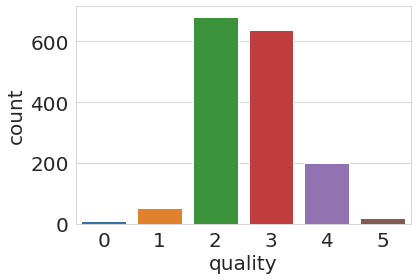

In [52]:
# Lets look at the distribution of the wine dataset

b = sns.countplot(x="quality", data=wine)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Suppose we have a million samples. A 5 fold cross-validation would mean training on 800k samples and validation on 200k. 

This can be very expensive for a dataset of this size so in this case you should use **hold-out based validation**.

Hold-out works the same as k-fold but instead you create 10 folds instead of 5 and keep one of those folds as hold-out.

Hold-out is also used very frequently with **time-series data.**
Say you are tasked with predicting the sales for a store in 2020 and you have data from 2015-2019. In this case you can select all the data from 2019 as hold out and the rest is used to train the model. 

In many cases, you have to deal with small datasets and creating big validation sets means losing a lot of data for the model to learn. 

Here it is best to use a type of K-Fold cross-validation where the k=N, where N is the number of samples in the dataset. 

## Stratified k-fold for a regression problem 

You have to divide the target into bins and then uyou can use stratified k-fold in the same way as for classification problems. 

If you have a lot of samples > 10k, > 100k then just use 10-20 bins.

In [ ]:
# stratified k-fold for regression 
def create_folds(data):  
  #we create a new column called kfold and fill it with -1  
  data["kfold"] = -1  
  #the next step is to randomize the rows of the data  
  data = data.sample(frac=1).reset_index(drop=True)  
  #calculate the number of bins by Sturge's rule  
  #I take the floor of the value, you can also  
  #just round it  
  num_bins = np.floor(1 + np.log2(len(data)))  
  #bin targets  
  data.loc[:, "bins"] = pd.cut(  data["target"], bins=num_bins, labels=False  )  
  #initiate the kfold class from model_selection module  
  kf = model_selection.StratifiedKFold(n_splits=5)  
  #fill the new kfold column  
  #note that, instead of targets, we use bins!  
  for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):  
    data.loc[v_, 'kfold'] = f  
    #drop the bins column  
    data = data.drop("bins", axis=1)  
    #return dataframe with folds  
    return data  

if  __name__  ==  "__main__":  
#we create a sample dataset with 15000 samples  
#and 100 features and 1 target  
  X, y = datasets.make_regression(  n_samples=15000, n_features=100, n_targets=1  )  
  #create a dataframe out of our numpy arrays  
  df = pd.DataFrame(  X,  columns=[f"f_{i}" for i in range(X.shape[1])]  )  
  df.loc[:, "target"] = y  
  #create folds  
  df = create_folds(df) 

Cross-validation is the first and most essential step when it comes to building a machine learning model. If you want to do feature engineering, split your data first.
if you're going to build models, split the data first. 

If you have *a good cross-validation scheme in which validation data is representative of training and real-world data*, you will be able to build a good machine learning model which is highly generalizable. 



